<a href="https://colab.research.google.com/github/Odima-dev/Data-Science-and-Machine-Learning/blob/main/WheatandtheChessboardProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Arranging wheat on a 4-suare board (list): [1, 2, 4, 8]
Arranging wheat on a 4-suare board (ndarray): [1 2 4 8]
Arranging wheat on a 2x2 chessboard (ndarray): 
[[1 2]
 [4 8]]
Arranging wheat on an 8x8 chessboard (ndarray): 
[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736     

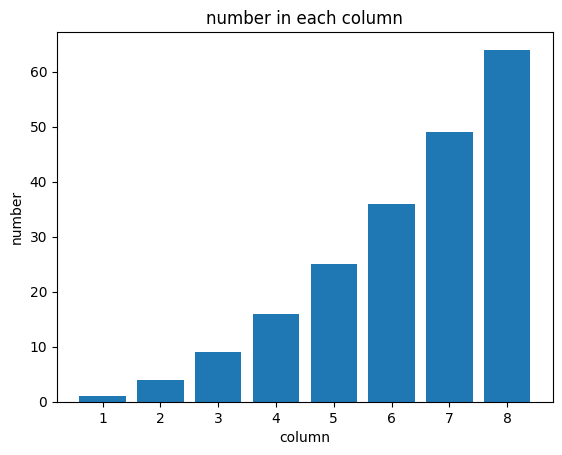

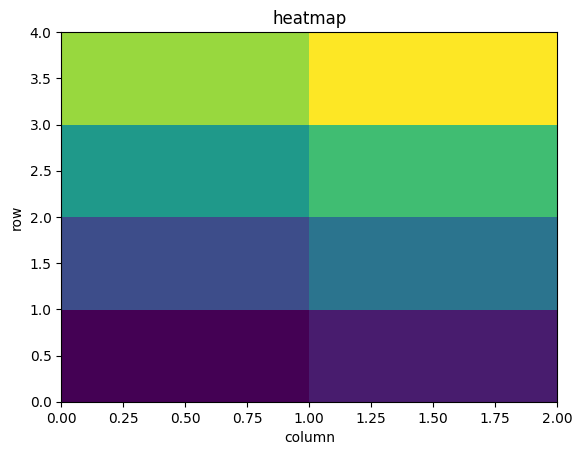



Sum of the first half of the chessboard: 4294967295
Sum of the second half of the chessboard: 18446744069414584320
Second half contains 4294967296.0 times more wheat than first half
Arranging the wheat on a 4-square board（ndarray）：[1 2 4 8]
Number of wheat in the last square：9223372036854775808


3.05 µs ± 129 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
1.51 µs ± 81.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
Broadcasting is more efficient than np.append()


In [26]:
import numpy as np
import matplotlib.pyplot as plt

#1. Small blocks (4 square) method
n_squares = 4
small_board_list = [1]
for _ in range(n_squares-1):
  small_board_list.append(2 * small_board_list[-1])
print("Arranging wheat on a 4-suare board (list):", small_board_list)

#Creating ndarray using this list
small_board_ndarray = np.array(small_board_list)
print("Arranging wheat on a 4-suare board (ndarray): {}" .format(small_board_ndarray))

#2. Number of wheat pieces on a 2x2 chessboard
small_board_2x2 = 2 ** np.arange(4)
small_board_2x2 = small_board_2x2.reshape((2, 2))
print("Arranging wheat on a 2x2 chessboard (ndarray): \n{}" .format(small_board_2x2))

#3. 8x8 chessboard
def create_chessboard(n, m):
  """Creating a function that returns an ndarray containing the number of grains on an nxm chessboard
  n - number of rows
  m - number of columns
  """
  n_squares = n * m
  indices = np.arange(n_squares).astype(np.uint64)
  chessboard = 2 ** indices
  chessboard = chessboard.reshape((n, m))
  return chessboard

#Using this function to find the number of grains on an 8x8 chessboard
chess_board_8x8 = create_chessboard(8, 8)
print("Arranging wheat on an 8x8 chessboard (ndarray): \n{}" .format(chess_board_8x8))
print("\n")

#Finding the total number of grains on an 8x8 chessboard
total_grains = chess_board_8x8.sum()
print("Total number of grains on an 8x8 chessboard: {}" .format(total_grains))
print("\n")

#Finding the average of each column
average_per_column = chess_board_8x8.mean(axis=0)
print("Average number of grains per column: {}" .format(average_per_column))
print("\n")

#Visualizing it as a bar graph
plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.bar(np.arange(1,8+1), np.arange(1,8+1)**2)
plt.show()
print("\n")

#Visualizing the number of wheat grains on an 8x8 chessboard as a heatmap
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(np.array([0, 1, 3, 5, 7, 9, 11, 13]).reshape(4, 2))
plt.show()
print("\n")

#4. The second half of the chessboard
first_half_sum = chess_board_8x8[:4, :].sum()
second_half_sum = chess_board_8x8[4:, :].sum()
ratio = second_half_sum / first_half_sum
print("Sum of the first half of the chessboard: {}" .format(first_half_sum))
print("Sum of the second half of the chessboard: {}" .format(second_half_sum))
print("Second half contains {} times more wheat than first half" .format(ratio))

#5. Other calculation methods
#using np.append()
n_squares = 64
board_ndarray_append = np.array([1], dtype=np.uint64)
for _ in range(n_squares - 1):
  board_ndarray_append = np.append(board_ndarray_append, 2 * board_ndarray_append[-1])
print("Arranging the wheat on a 4-square board（ndarray）：{}".format(small_board_ndarray))

#numpy broadcasting
n_squares = 64
indices_of_squares = np.arange(n_squares).astype(np.uint64)
board_ndarray = 2**indices_of_squares
print("Number of wheat in the last square：{}".format(board_ndarray[-1]))
print("\n")

#Comparison of calculation times
%timeit np.append(np.array([1]), [2, 4, 8])
%timeit 2 ** np.arange(4)
print("Broadcasting is more efficient than np.append()")